In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('seaborn-colorblind')

# read all network edgelist from file
def read_edge(net_name):
    path = '/home/hermuba/data0118/network1122/'
    filename = path + net_name + '_lls_rm_plasmid_edgelist'
    
    # skip first line header!!
    with open(filename, 'rb') as f:
      
        net = nx.read_edgelist(f, nodetype = str, comments = '#')
    return(net)
refseq = read_edge('refseq')
eskape = read_edge('eskape')

In [2]:
# read annotation file
gold_anno = pd.read_pickle('/home/hermuba/data0118/goldstandard/ec_rmplasmid_node_anno_df')

In [ ]:
gold_anno

In [11]:
eskape_acc = eskape.subgraph(gold_anno.loc[(~gold_anno['core']) & (gold_anno['GO'].isnull()) ].index)

In [12]:
eskape_acc.number_of_nodes()

927

In [13]:
eskape_acc.nodes

NodeView(('562.22810.con.0023_22|562.22810', '562.22859.con.0021_76|562.22859', 'JAPJ01000006_17|1328443.3', '562.22685.con.0019_1|562.22685', 'FLXF01000010_52|562.12961', '562.23819.con.0065_2|562.23819', 'JMUY01000001_8|1438670.3', '562.22434.con.0022_60|562.22434', '562.23301.con.0003_9|562.23301', '562.23322.con.0001_209|562.23322', '562.22588.con.0079_2|562.22588', '562.23830.con.0078_2|562.23830', '562.22561.con.0040_1|562.22561', '562.23345.con.0047_12|562.23345', '562.23611.con.0041_31|562.23611', '562.22913.con.0003_104|562.22913', 'FLXF01000007_81|562.12961', '562.23186.con.0003_38|562.23186', '562.22875.con.0004_110|562.22875', '562.22913.con.0018_45|562.22913', '562.23301.con.0064_5|562.23301', '562.23603.con.0053_14|562.23603', '562.22862.con.0045_1|562.22862', '562.22520.con.0051_1|562.22520', '562.23919.con.0050_2|562.23919', '562.23709.con.0045_8|562.23709', '562.23554.con.0068_1|562.23554', '562.22936.con.0027_63|562.22936', '562.23670.con.0007_122|562.23670', '562.236

In [16]:
nei = list(eskape_acc.neighbors('562.22810.con.0023_22|562.22810'))

In [18]:
nei.append('562.22810.con.0023_22|562.22810')

In [15]:
gold_anno.loc['562.22810.con.0023_22|562.22810']

cog_ID                                                       COG5301
cog_category                                                       S
cluster                                                 Cluster 1045
count                                                             27
core                                                           False
loose_best_ARO                                                   NaN
loose_ARO                                                        NaN
strict_best_ARO                                                  NaN
strict_ARO                                                       NaN
is_card                                                        False
resfam                                                           NaN
aclame_title       protein:vir:5708 Length: 913 # NCBI annotation...
is_aclame                                                       True
nr                 WP_097289915.1 phage tail protein [Escherichia...
hypo_nr                           

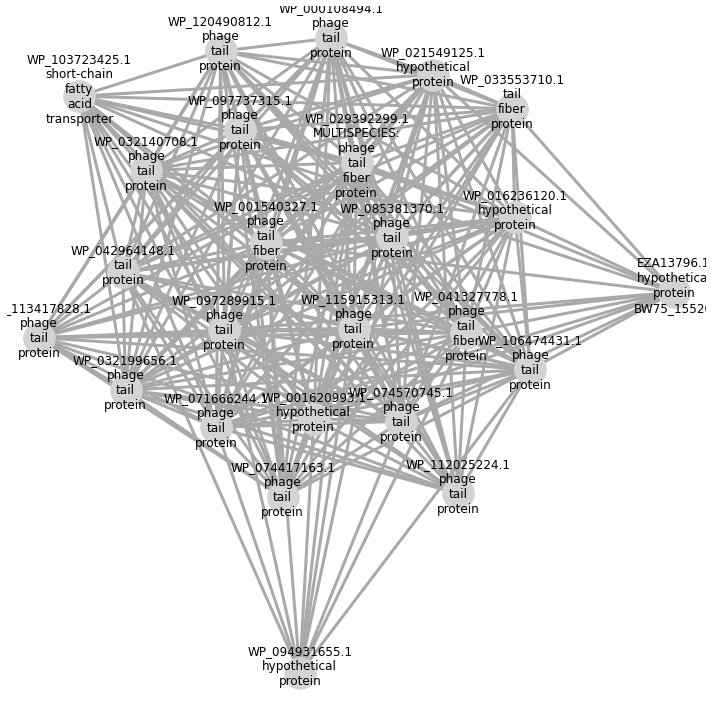

In [49]:
G=eskape_acc.subgraph(nei)
f, ax = plt.subplots(1,1,figsize = (10,10))
lbl = gold_anno.loc[nei, 'nr'].str.split('[', expand = True)[0].str.replace(' ', '\n')
nx.draw(G, labels = lbl.to_dict(), ax = ax, node_color = 'lightgrey', edge_color = 'darkgrey', node_size = 1000, font_size = 12, width = 3)
plt.tight_layout()
f.savefig('/home/hermuba/data0118/fig/suppl_eskape.svg', dpi= 300)

562.23886.con.0056_3|562.23886                           WP_042964148.1 tail protein 
562.23797.con.0001_212|562.23797                 WP_021549125.1 hypothetical protein 
562.22799.con.0019_23|562.22799              WP_001540327.1 phage tail fiber protein 
562.22428.con.0013_40|562.22428                  WP_001620993.1 hypothetical protein 
562.22810.con.0004_214|562.22810                   WP_112025224.1 phage tail protein 
562.23283.con.0020_18|562.23283           EZA13796.1 hypothetical protein BW75_15520 
JMUY01000001_5|1438670.3                           WP_032140708.1 phage tail protein 
562.23793.con.0066_3|562.23793                     WP_032199656.1 phage tail protein 
562.22697.con.0003_41|562.22697                    WP_113417828.1 phage tail protein 
562.23092.con.0007_105|562.23092                   WP_000108494.1 phage tail protein 
562.23482.con.0002_353|562.23482                   WP_097737315.1 phage tail protein 
562.22461.con.0019_20|562.22461                    WP_